In [1]:
from autolens.profiles import mass_profiles as mp
from autolens.galaxy import galaxy as g
from autolens.lensing import ray_tracing
from autolens.imaging import mask
from autolens.inversion import pixelizations as pix
from autolens.plotting import mapper_plotters

# We'll start by learning about pixelizations, which we typically apply to a source-plane (but could, if we wanted,
# apply to an image-plane and the lens galaxy). 

In [2]:
# Lets setup a lensed source-plane grid, using a lens galaxy and tracer.
image_plane_grids = mask.ImagingGrids.from_shape_and_pixel_scale(shape=(100, 100), pixel_scale=0.05,
                                                                 sub_grid_size=2)

lens_galaxy = g.Galaxy(mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=90.0, einstein_radius=1.6))

# (Our source galaxy doesn't have a light profile from here on, as we're reconstructing its light using a pixelization).
tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[g.Galaxy()],
                                             image_plane_grids=[image_plane_grids])


In [3]:
# Next, lets set up a pixelization using the 'pixelizations' module, which we've imported as 'pix'.
# There are multiple pixelizations available in PyAutoLens, but for now we'll keep it simple and use a uniform
# rectangular grid. As usual, the grid's 'shape' defines its (y,x) dimensions.
rectangular = pix.Rectangular(shape=(25, 25))

In [4]:
# By itself, a pixelization doesn't tell us much. It has no grid of coordinates, no image, and nothing which tells it
# about the lens we're fitting. This information comes when we use the pixelization to set up a 'mapper'.
# (The 'border=None' will be covered in tutorial 5, so just ignore it for now!)
mapper = rectangular.mapper_from_grids_and_border(grids=tracer.source_plane.grids[0], border=None)

In [5]:
# This mapper is a 'RectangularMapper' - every pixelization generates it owns mapper.
print(type(mapper))

<class 'autolens.inversion.mappers.RectangularMapper'>


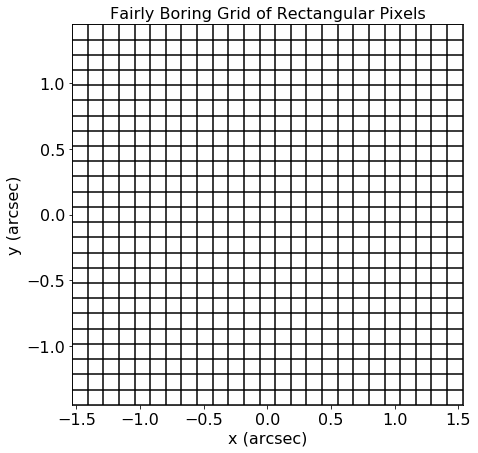

In [6]:
# By plotting our mapper, we now see our pixelization. Its a fairly boring grid of rectangular pixels.
mapper_plotters.plot_rectangular_mapper(mapper=mapper, should_plot_grid=False, 
                                        title='Fairly Boring Grid of Rectangular Pixels')

In [7]:
# However, the mapper does contain lots of interesting information about our pixelization, for example its geometry
# attribute tells us where the pixel centers are located
print('Rectangular Grid Pixel Centre 1:')
print(mapper.geometry.pixel_centres[0])
print('Rectangular Grid Pixel Centre 2:')
print(mapper.geometry.pixel_centres[1])
print('Rectangular Grid Pixel Centre 3:')
print(mapper.geometry.pixel_centres[2])
print('etc.')

Rectangular Grid Pixel Centre 1:
[ 1.38696755 -1.47231025]
Rectangular Grid Pixel Centre 2:
[ 1.38696755 -1.34961773]
Rectangular Grid Pixel Centre 3:
[ 1.38696755 -1.22692521]
etc.


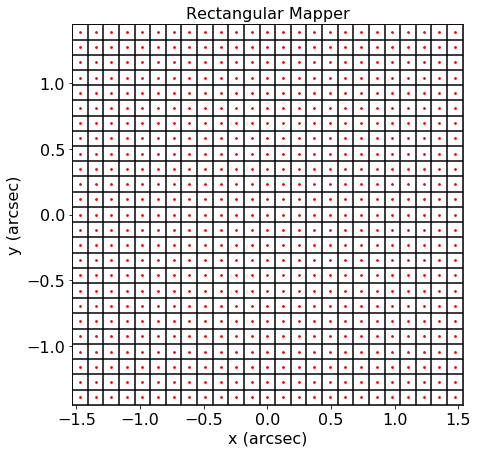

In [8]:
# Infact, we can plot these centre on our grid - to make it look slightly less boring!
mapper_plotters.plot_rectangular_mapper(mapper=mapper, should_plot_grid=False, should_plot_centres=True)

In [9]:
# The mapper also has the (source-plane) grid that we passed when we set it up. Lets check they're the same grids.
print('Source Grid Pixel 1')
print(tracer.source_plane.grids[0].image[0])
print(mapper.grids.image[0])
print('Source Grid Pixel 2')
print(tracer.source_plane.grids[0].image[1])
print(mapper.grids.image[1])
print('etc.')

Source Grid Pixel 1
[ 1.43642452 -1.27043929]
[ 1.43642452 -1.27043929]
Source Grid Pixel 2
[ 1.42513796 -1.23184166]
[ 1.42513796 -1.23184166]
etc.


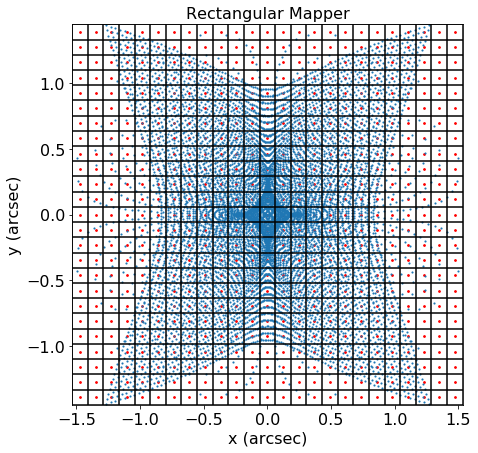

In [11]:
# We can over-lay the grid on top. Its starting too look a bit less boring now!
mapper_plotters.plot_rectangular_mapper(mapper=mapper, should_plot_centres=True, should_plot_grid=True)

In [12]:

# Finally, the mapper and its geometry has lots more information about the pixelization, for example, the arc-second
# size and dimensions.
print(mapper.geometry.shape_arc_seconds)
print(mapper.geometry.arc_second_maxima)
print(mapper.geometry.arc_second_minima)

(2.889515726860229, 3.067313013748509)
(1.4447578634301146, 1.5336565068742545)
(-1.4447578634301146, -1.5336565068742545)


In [13]:
# And with that, we're done. This was a relatively gentle introduction in the world of pixelizations, but one that
# was hopefully easy to follow. Think about the following questions before moving on to the next tutorial:

# 1) Look at how the source-grid coordinates are distributed over the rectangular pixel-grid. Are these points
#    distributed evenly over the rectangular grid's pixels? Do some pixels have a lot more grid-points inside of them?
#    Do some pixels have no grid-points in them?

#  2) The rectangular pixelization's edges are aligned with the most exterior coordinates of the source-grid. This is
#     intentional - why do you think this is?